Fashion MNIST CNN, practice
Arkadiusz Dempc

In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [3]:
Img_shape = 28
Num_classes = 10
test_size = 0.2
random_state = 1234
No_epochs = 100
Batch_size = 128

In [4]:
train_dataset = pd.read_csv("C:/Users/arekd/OneDrive/Pulpit/Fashion Mnist/fashion-mnist_train.csv")
test_dataset = pd.read_csv("C:/Users/arekd/OneDrive/Pulpit/Fashion Mnist/fashion-mnist_test.csv")

In [6]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [43]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(Num_classes, activation='softmax'))

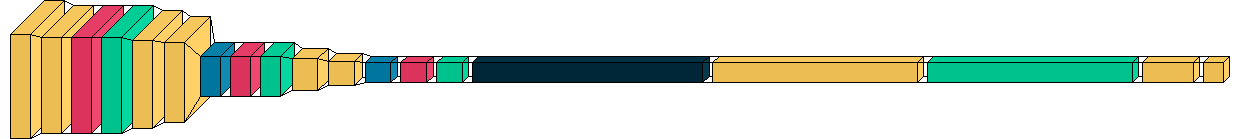

In [44]:
visualkeras.layered_view(model)

*Tweaking the learning rate in adam optimizer for better accuracy*

In [45]:
optimizer = Adam(lr=0.001)

model.compile(optimizer = optimizer,
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [46]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/100
375/375 [==============================] - 234s 622ms/step - loss: 0.7671 - accuracy: 0.7448 - val_loss: 0.5605 - val_accuracy: 0.8018
Epoch 2/100
375/375 [==============================] - 248s 663ms/step - loss: 0.3491 - accuracy: 0.8711 - val_loss: 0.3515 - val_accuracy: 0.8711
Epoch 3/100
375/375 [==============================] - 249s 664ms/step - loss: 0.2895 - accuracy: 0.8938 - val_loss: 0.2738 - val_accuracy: 0.8974
Epoch 4/100
375/375 [==============================] - 247s 659ms/step - loss: 0.2571 - accuracy: 0.9043 - val_loss: 0.3098 - val_accuracy: 0.8903
Epoch 5/100
375/375 [==============================] - 249s 664ms/step - loss: 0.2344 - accuracy: 0.9115 - val_loss: 0.2564 - val_accuracy: 0.9082
Epoch 6/100
375/375 [==============================] - 239s 636ms/step - loss: 0.2192 - accuracy: 0.9184 - val_loss: 0.2316 - val_accuracy: 0.9179
Epoch 7/100
375/375 [==============================] - 248s 660ms/step - loss: 0.2007 - accuracy: 0.9264 - val_loss: 0

In [47]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 12s 39ms/step - loss: 0.4186 - accuracy: 0.9384
Test loss: 0.41855865716934204
Test accuracy: 0.9383999705314636
